In [1]:
import glob
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from pandas.plotting import table
from PIL import Image, ExifTags
import os

In [2]:
file = 3

In [3]:
df = pd.read_csv("video_data_info_{}.csv".format(str(file)), index_col=0)
df

,filename
0,3_0032.png
1,3_0026.png
2,3_0027.png
3,3_0033.png
4,3_0019.png
...,...
99,3_0014.png
100,3_0016.png
101,3_0002.png
102,3_0003.png


In [4]:
original_files = glob.glob("V_pic_{}/*.*".format(str(file)))
original_files

['V_pic_3/3_0032.png',
 'V_pic_3/3_0026.png',
 'V_pic_3/3_0027.png',
 'V_pic_3/3_0033.png',
 'V_pic_3/3_0019.png',
 'V_pic_3/3_0025.png',
 'V_pic_3/3_0031.png',
 'V_pic_3/3_0030.png',
 'V_pic_3/3_0024.png',
 'V_pic_3/3_0018.png',
 'V_pic_3/3_0020.png',
 'V_pic_3/3_0034.png',
 'V_pic_3/3_0008.png',
 'V_pic_3/3_0009.png',
 'V_pic_3/3_0035.png',
 'V_pic_3/3_0021.png',
 'V_pic_3/3_0037.png',
 'V_pic_3/3_0023.png',
 'V_pic_3/3_0022.png',
 'V_pic_3/3_0036.png',
 'V_pic_3/3_0092.png',
 'V_pic_3/3_0086.png',
 'V_pic_3/3_0079.png',
 'V_pic_3/3_0051.png',
 'V_pic_3/3_0045.png',
 'V_pic_3/3_0044.png',
 'V_pic_3/3_0050.png',
 'V_pic_3/3_0078.png',
 'V_pic_3/3_0087.png',
 'V_pic_3/3_0093.png',
 'V_pic_3/3_0085.png',
 'V_pic_3/3_0091.png',
 'V_pic_3/3_0046.png',
 'V_pic_3/3_0052.png',
 'V_pic_3/3_0053.png',
 'V_pic_3/3_0047.png',
 'V_pic_3/3_0090.png',
 'V_pic_3/3_0084.png',
 'V_pic_3/3_0080.png',
 'V_pic_3/3_0094.png',
 'V_pic_3/3_0043.png',
 'V_pic_3/3_0057.png',
 'V_pic_3/3_0056.png',
 'V_pic_3/3

In [5]:
df_all = pd.DataFrame({"path": original_files, "filename": [f.split("/")[1] for f in original_files]})
df_all

,path,filename
0,V_pic_3/3_0032.png,3_0032.png
1,V_pic_3/3_0026.png,3_0026.png
2,V_pic_3/3_0027.png,3_0027.png
3,V_pic_3/3_0033.png,3_0033.png
4,V_pic_3/3_0019.png,3_0019.png
...,...,...
99,V_pic_3/3_0014.png,3_0014.png
100,V_pic_3/3_0016.png,3_0016.png
101,V_pic_3/3_0002.png,3_0002.png
102,V_pic_3/3_0003.png,3_0003.png


## PIL

In [31]:
df_all = df_all.sort_values(by='path').reset_index(drop=True)
df_all

,path,filename
0,V_pic_3/3_0001.png,3_0001.png
1,V_pic_3/3_0002.png,3_0002.png
2,V_pic_3/3_0003.png,3_0003.png
3,V_pic_3/3_0004.png,3_0004.png
4,V_pic_3/3_0005.png,3_0005.png
...,...,...
99,V_pic_3/3_0100.png,3_0100.png
100,V_pic_3/3_0101.png,3_0101.png
101,V_pic_3/3_0102.png,3_0102.png
102,V_pic_3/3_0103.png,3_0103.png


In [32]:
new_filenames = ["{}.jpg".format(f.split(".")[0]) for f in df_all['filename']]
df_all.insert(2, "new_filename", new_filenames)
df_all

,path,filename,new_filename
0,V_pic_3/3_0001.png,3_0001.png,3_0001.jpg
1,V_pic_3/3_0002.png,3_0002.png,3_0002.jpg
2,V_pic_3/3_0003.png,3_0003.png,3_0003.jpg
3,V_pic_3/3_0004.png,3_0004.png,3_0004.jpg
4,V_pic_3/3_0005.png,3_0005.png,3_0005.jpg
...,...,...,...
99,V_pic_3/3_0100.png,3_0100.png,3_0100.jpg
100,V_pic_3/3_0101.png,3_0101.png,3_0101.jpg
101,V_pic_3/3_0102.png,3_0102.png,3_0102.jpg
102,V_pic_3/3_0103.png,3_0103.png,3_0103.jpg


In [33]:
df_all.to_csv('video_data_info_{}_2.csv'.format(str(file)))

## PIL: crop

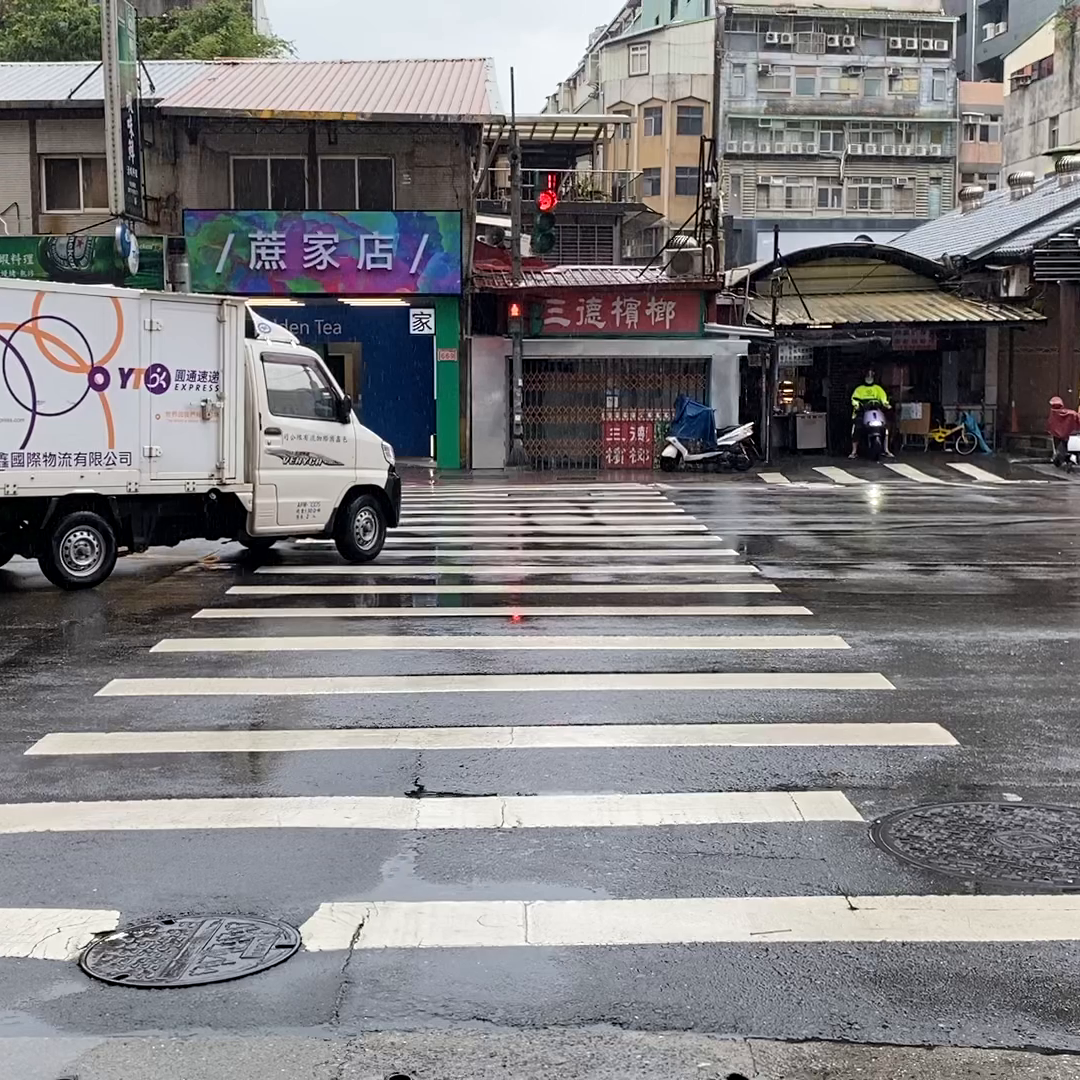

In [34]:
img = Image.open(df_all.iloc[0]["path"])
w, h = img.size # w = 4000; h = 3000
if h > w:
    img_cropped = img.crop((0, (h-w)/2, w, h-((h-w)/2))) # L, T, R, B
elif w > h:
    img_cropped = img.crop(((w-h)/2, 0, w-((w-h)/2), h))
else:
    pass
img_cropped
# img_cropped.save("test.jpg")

In [35]:
for i in range(len(df)):
    file_path = df_all.iloc[i]["path"]
    new_path = os.path.join("processed_data_{}".format(str(file)), df_all.iloc[i]["new_filename"])
    print("{} => {}".format(file_path, new_path))
    
    try:
        img = Image.open(file_path)
    
    except Exception as err:
        print("cannot handle {}".format(file_path))
        print(err)
        
    try:
        exif = img._getexif()
        
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation]=='Orientation':
                break

        if exif[orientation] == 3:
            img=img.rotate(180, expand=True)
        elif exif[orientation] == 6:
            img=img.rotate(270, expand=True)
        elif exif[orientation] == 8:
            img=img.rotate(90, expand=True)

        img.save(file_path)

    except Exception as err:
        # cases: image don't have getexif
        pass

    w, h = img.size # w = 4000; h = 3000
    if h > w:
        img_cropped = img.crop((0, h-w, w, h)) # L, T, R, B
    elif w > h:
        img_cropped = img.crop(((w-h)/2, 0, w-((w-h)/2), h))
    else:
        pass
    img_resized = img_cropped.resize((1024, 1024))
    img_resized.save(new_path)


V_pic_3/3_0001.png => processed_data_3/3_0001.jpg
V_pic_3/3_0002.png => processed_data_3/3_0002.jpg
V_pic_3/3_0003.png => processed_data_3/3_0003.jpg
V_pic_3/3_0004.png => processed_data_3/3_0004.jpg
V_pic_3/3_0005.png => processed_data_3/3_0005.jpg
V_pic_3/3_0006.png => processed_data_3/3_0006.jpg
V_pic_3/3_0007.png => processed_data_3/3_0007.jpg
V_pic_3/3_0008.png => processed_data_3/3_0008.jpg
V_pic_3/3_0009.png => processed_data_3/3_0009.jpg
V_pic_3/3_0010.png => processed_data_3/3_0010.jpg
V_pic_3/3_0011.png => processed_data_3/3_0011.jpg
V_pic_3/3_0012.png => processed_data_3/3_0012.jpg
V_pic_3/3_0013.png => processed_data_3/3_0013.jpg
V_pic_3/3_0014.png => processed_data_3/3_0014.jpg
V_pic_3/3_0015.png => processed_data_3/3_0015.jpg
V_pic_3/3_0016.png => processed_data_3/3_0016.jpg
V_pic_3/3_0017.png => processed_data_3/3_0017.jpg
V_pic_3/3_0018.png => processed_data_3/3_0018.jpg
V_pic_3/3_0019.png => processed_data_3/3_0019.jpg
V_pic_3/3_0020.png => processed_data_3/3_0020.jpg
